In [22]:
import FewShotCVRP.examples.analysis.ea_stats_store as ea_stats
from importlib import reload


reload(ea_stats)

_st = ea_stats.EAStatsStore()
_st.load_raw("ea_runs/raw_runs.parquet")
_st.compute_stats()


/data/antonovk/FewShotCVRP/FewShotCVRP/examples/analysis/ea_stats_store.py:368: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  merged = pd.concat([self._raw, df_new], ignore_index=True)


,algorithm_name,cvrp_instance_name,nn_trained_on_instance,nn_training_method,evals,n_runs,best_so_far_mean,best_so_far_std,theta_mean,theta_std
0,descent,X-n101-k25.xml,NaN,NaN,1,100,58559.10,1824.583564,-1.000000,0.000000
1,descent,X-n101-k25.xml,NaN,NaN,20001,100,30367.41,406.036673,1.000000,0.000000
2,descent,X-n101-k25.xml,NaN,NaN,40001,100,29705.03,359.258115,1.000000,0.000000
3,descent,X-n101-k25.xml,NaN,NaN,60001,100,29469.16,356.546021,1.000000,0.000000
4,descent,X-n101-k25.xml,NaN,NaN,80001,100,29316.96,351.703184,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
3769,theta_voting_scaled,X-n819-k171.xml,NaN,NaN,920001,100,309789.99,3538.060698,5.444371,5.844786
3770,theta_voting_scaled,X-n819-k171.xml,NaN,NaN,940001,100,308496.20,3476.212312,6.476088,11.020694
3771,theta_voting_scaled,X-n819-k171.xml,NaN,NaN,960001,100,307168.13,3458.833828,5.543613,7.191305
3772,theta_voting_scaled,X-n819-k171.xml,NaN,NaN,980001,100,305916.54,3443.174327,5.637528,10.696702


In [23]:
ans = _st.summarize(print_output=True)


=== Summary by (algorithm_name, cvrp_instance_name, nn_training_method, nn_trained_on_instance) ===
       algorithm_name cvrp_instance_name nn_training_method nn_trained_on_instance  n_runs  total_rows  rows_per_run_mean  rows_per_run_std  rows_per_run_min  rows_per_run_max
              descent     X-n101-k25.xml                NaN                    NaN     100        5100               51.0               0.0                51                51
              descent     X-n209-k16.xml                NaN                    NaN     100        5100               51.0               0.0                51                51
              descent     X-n219-k73.xml                NaN                    NaN     100        5100               51.0               0.0                51                51
              descent     X-n367-k17.xml                NaN                    NaN     100        5100               51.0               0.0                51                51
              desce

In [24]:
import FewShotCVRP.examples.analysis.ea_stats_store as ea_stats
from importlib import reload


reload(ea_stats)

_st = ea_stats.EAStatsStore()
_st.load_raw("ea_runs/raw_runs.parquet")

instance_name = "X-n641-k35.xml"

few_shot_vals = _st._raw.loc[
    (_st._raw["algorithm_name"] == "few_shot")
    & (_st._raw["cvrp_instance_name"] == instance_name)
    & (_st._raw["evals"] == 1000001),
    "best_so_far",
].to_numpy()

theta_fixed_1_vals = _st._raw.loc[
    (_st._raw["algorithm_name"] == "theta_fixed_1")
    & (_st._raw["cvrp_instance_name"] == instance_name)
    & (_st._raw["evals"] == 1000001),
    "best_so_far",
].to_numpy()

theta_fixed_10_vals = _st._raw.loc[
    (_st._raw["algorithm_name"] == "theta_fixed_10")
    & (_st._raw["cvrp_instance_name"] == instance_name)
    & (_st._raw["evals"] == 1000001),
    "best_so_far",
].to_numpy()

theta_schedule_linear_vals = _st._raw.loc[
    (_st._raw["algorithm_name"] == "theta_schedule_linear")
    & (_st._raw["cvrp_instance_name"] == instance_name)
    & (_st._raw["evals"] == 1000001),
    "best_so_far",
].to_numpy()

theta_voting_vals = _st._raw.loc[
    (_st._raw["algorithm_name"] == "theta_voting")
    & (_st._raw["cvrp_instance_name"] == instance_name)
    & (_st._raw["evals"] == 1000001),
    "best_so_far",
].to_numpy()

theta_voting_scaled_vals = _st._raw.loc[
    (_st._raw["algorithm_name"] == "theta_voting_scaled")
    & (_st._raw["cvrp_instance_name"] == instance_name)
    & (_st._raw["evals"] == 1000001),
    "best_so_far",
].to_numpy()

theta_one_fifth = _st._raw.loc[
    (_st._raw["algorithm_name"] == "theta_one_fifth")
    & (_st._raw["cvrp_instance_name"] == instance_name)
    & (_st._raw["evals"] == 1000001),
    "best_so_far",
].to_numpy()


/data/antonovk/FewShotCVRP/FewShotCVRP/examples/analysis/ea_stats_store.py:368: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  merged = pd.concat([self._raw, df_new], ignore_index=True)


In [64]:
import numpy as np
from scipy import stats


import numpy as np
from scipy import stats


def test_x_less_than_bestY(x, Y, alpha=0.05):
    """
    Проверяет H1: mean(x) < mean(Y_best), где Y_best — выборка из Y
    с минимальным средним. Используется односторонний Welch t-test
    + Bonferroni коррекция за выбор лучшей из m групп.

    Возвращает dict с полями:
      - idx_best: индекс выбранной лучшей выборки
      - mean_x, mean_best
      - t_stat: t-статистика Welch для (x vs Y_best), альтернатива 'less'
      - p_unadj: односторонний p-value для пары (без поправки)
      - p_bonf: p-value * m   (обрезано сверху единицей)
      - reject: True/False, отвергаем ли H0 при уровне alpha по p_bonf
    """
    x = np.asarray(x).ravel()
    Y = [np.asarray(y).ravel() for y in Y]
    m = len(Y)
    if m == 0:
        raise ValueError("Y must contain at least one sample.")

    means = np.array([y.mean() for y in Y])
    idx_best = int(np.argmin(means))
    y_best = Y[idx_best]

    # Односторонний Welch t-test: H0: mu_x = mu_y, H1: mu_x < mu_y
    t_stat, p_unadj = stats.ttest_ind(x, y_best, equal_var=False, alternative="less")

    # Bonferroni за выбор лучшей из m групп
    p_bonf = min(float(p_unadj) * m, 1.0)

    return {
        "idx_best": idx_best,
        "mean_x": float(x.mean()),
        "mean_best": float(y_best.mean()),
        "t_stat": float(t_stat),
        "p_unadj": float(p_unadj),
        "p_bonf": p_bonf,
        "reject": p_bonf < alpha,
    }


vals = []
for instance_name in [
    # "X-n101-k25.xml",
    # "X-n209-k16.xml",
    # "X-n641-k35.xml",
    "X-n219-k73.xml",
    "X-n367-k17.xml",
    "X-n480-k70.xml",
    "X-n819-k171.xml",
]:
    few_shot_vals = _st._raw.loc[
        (_st._raw["algorithm_name"] == "few_shot")
        & (_st._raw["cvrp_instance_name"] == instance_name)
        & (_st._raw["evals"] == 1000001),
        "best_so_far",
    ].to_numpy()

    theta_fixed_1_vals = _st._raw.loc[
        (_st._raw["algorithm_name"] == "theta_fixed_1")
        & (_st._raw["cvrp_instance_name"] == instance_name)
        & (_st._raw["evals"] == 1000001),
        "best_so_far",
    ].to_numpy()

    theta_fixed_10_vals = _st._raw.loc[
        (_st._raw["algorithm_name"] == "theta_fixed_10")
        & (_st._raw["cvrp_instance_name"] == instance_name)
        & (_st._raw["evals"] == 1000001),
        "best_so_far",
    ].to_numpy()

    theta_schedule_linear_vals = _st._raw.loc[
        (_st._raw["algorithm_name"] == "theta_schedule_linear")
        & (_st._raw["cvrp_instance_name"] == instance_name)
        & (_st._raw["evals"] == 1000001),
        "best_so_far",
    ].to_numpy()

    theta_voting_vals = _st._raw.loc[
        (_st._raw["algorithm_name"] == "theta_voting")
        & (_st._raw["cvrp_instance_name"] == instance_name)
        & (_st._raw["evals"] == 1000001),
        "best_so_far",
    ].to_numpy()

    theta_voting_scaled_vals = _st._raw.loc[
        (_st._raw["algorithm_name"] == "theta_voting_scaled")
        & (_st._raw["cvrp_instance_name"] == instance_name)
        & (_st._raw["evals"] == 1000001),
        "best_so_far",
    ].to_numpy()

    theta_one_fifth = _st._raw.loc[
        (_st._raw["algorithm_name"] == "theta_one_fifth")
        & (_st._raw["cvrp_instance_name"] == instance_name)
        & (_st._raw["evals"] == 1000001),
        "best_so_far",
    ].to_numpy()

    res = test_x_less_than_bestY(
        x=few_shot_vals,
        Y=[
            theta_schedule_linear_vals,
            theta_fixed_1_vals,
            theta_fixed_10_vals,
            theta_voting_vals,
            # theta_voting_scaled_vals,
            theta_one_fifth,
        ],
    )
    print(
        f"instance: {instance_name}",
        f"is_few_shot_best: {res['mean_x'] < res['mean_best']}",
        f"is_equality_rejected: {res['reject']}",
        f"res: {res}",
    )
    if res['reject']:
        vals.append((res["mean_best"] - res["mean_x"]) / res["mean_best"] * 100)

np.mean(np.asarray(vals))

instance: X-n219-k73.xml is_few_shot_best: True is_equality_rejected: False res: {'idx_best': 4, 'mean_x': 132627.8, 'mean_best': 132681.5, 't_stat': -0.38711950022707275, 'p_unadj': 0.34954564799978355, 'p_bonf': 1.0, 'reject': False}
instance: X-n367-k17.xml is_few_shot_best: True is_equality_rejected: True res: {'idx_best': 4, 'mean_x': 66500.67, 'mean_best': 67947.88, 't_stat': -8.580694857815324, 'p_unadj': 1.6413736763579716e-15, 'p_bonf': 8.206868381789859e-15, 'reject': True}
instance: X-n480-k70.xml is_few_shot_best: True is_equality_rejected: True res: {'idx_best': 4, 'mean_x': 163462.43, 'mean_best': 164729.32, 't_stat': -4.9047572617244155, 'p_unadj': 9.732988712926614e-07, 'p_bonf': 4.866494356463307e-06, 'reject': True}
instance: X-n819-k171.xml is_few_shot_best: True is_equality_rejected: True res: {'idx_best': 3, 'mean_x': 300873.35, 'mean_best': 307124.65, 't_stat': -13.92797615484862, 'p_unadj': 2.4151921172269734e-29, 'p_bonf': 1.2075960586134868e-28, 'reject': True}

np.float64(1.644794634125085)

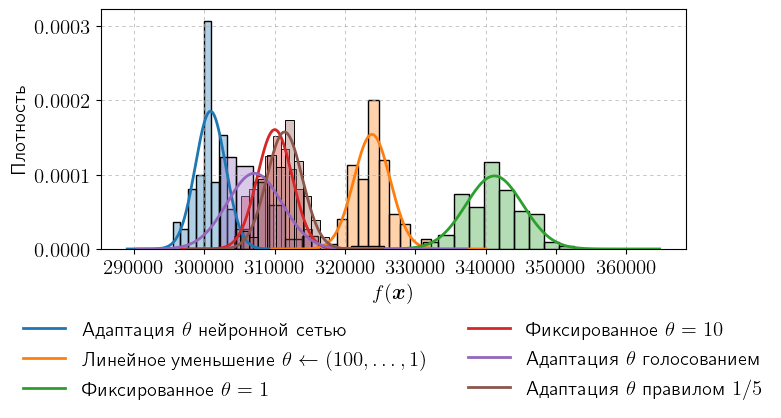

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import seaborn as sns

import FewShotCVRP.utils.plots as myplots

myplots.good_plt_config()

# ColorBrewer Set2 (8-color qualitative palette)
SET2_8 = [
    "#66C2A5",
    "#FC8D62",
    "#8DA0CB",
    "#E78AC3",
    "#A6D854",
    "#FFD92F",
    "#E5C494",
    "#B3B3B3",
]

DEFAULT_MPL_COLORS = plt.rcParams["axes.prop_cycle"].by_key()["color"]


def get_label_name(algorithm_name):
    if algorithm_name == "few_shot":
        return r"Адаптация $\theta$ нейронной сетью"
    if algorithm_name == "theta_control":
        return r"Адаптация $\theta$ нейронной сетью"
    if algorithm_name == "descent":
        return "Cинхронный спуск"
    if algorithm_name == "theta_schedule_linear":
        return r"Линейное уменьшение $\theta \gets \br{100, \ldots, 1}$"
    if algorithm_name == "theta_fixed_1":
        return r"Фиксированное $\theta=1$"
    if algorithm_name == "theta_fixed_10":
        return r"Фиксированное $\theta=10$"
    if algorithm_name == "theta_voting":
        return r"Адаптация $\theta$ голосованием"
    if algorithm_name == "theta_voting_scaled":
        return r"Адаптация $\theta$ масштабированным голосованием"
    if algorithm_name == "theta_one_fifth":
        return r"Адаптация $\theta$ правилом $1/5$"


def analyze(xs, labels=None, savepath="../outputs/figures/normal-dist-multi.pdf"):
    """
    Plot multiple distributions (histogram + KDE + Normal MLE PDF) on one figure.

    Args:
        xs: list of 1D array-like vectors.
        labels: list of str, optional, same length as xs.
        savepath: output PDF path.
    """
    # Normalize input: allow a single array to be passed
    if not isinstance(xs, (list, tuple)):
        xs = [xs]
    n_series = len(xs)

    if labels is None:
        labels = [f"Series {i+1}" for i in range(n_series)]
    assert len(labels) == n_series, "labels must match length of xs"

    fig, ax = plt.subplots(figsize=(8, 5.5))

    handles, legend_labels = [], []

    for i, (x_raw, name) in enumerate(zip(xs, labels)):
        x = np.asarray(x_raw).ravel()
        color = DEFAULT_MPL_COLORS[i % len(SET2_8)]

        # Histogram + KDE (density) overlay for this series
        # seaborn.histplot supports kde=True and stat='density' to get a density-normalized histogram.
        h = sns.histplot(
            x,
            kde=False,
            stat="density",
            bins="sqrt",
            edgecolor="black",
            alpha=0.35,
            color=color,
            ax=ax,
            label=None,  # we’ll manage legend ourselves
        )

        # Fit Normal (MLE) and add its PDF curve
        mu_mle, sigma_mle = st.norm.fit(x)  # returns (loc, scale) for Normal
        x_grid = np.linspace(x.min() - 3 * sigma_mle, x.max() + 3 * sigma_mle, 400)
        pdf_mle = st.norm.pdf(x_grid, loc=mu_mle, scale=sigma_mle)

        (line_mle,) = ax.plot(
            x_grid,
            pdf_mle,
            linewidth=2,
            # label=rf"{name}: MLE $\mathcal{{N}}(\mu={mu_mle:.2f},\,\sigma={sigma_mle:.2f})$",
            label=name,
            color=color,
        )

        # Try to grab the KDE line Seaborn just added (it’s the most recent non-MLE line)
        kde_line = None
        # The last added line from histplot when kde=True is a KDE line (if available)
        # We find the most recent non-MLE line by iterating reversed
        for l in reversed(ax.lines):
            if l is not line_mle and l.get_color() == color:
                kde_line = l
                break

        # Build legend entries: one for KDE, one for MLE (skip per-series histogram to keep legend compact)
        if kde_line is not None:
            kde_line.set_linestyle("--")
            kde_line.set_linewidth(1.75)
            handles.append(kde_line)
            legend_labels.append(f"{name}: KDE")

        handles.append(line_mle)
        legend_labels.append(line_mle.get_label())

    ax.set_xlabel(r"$f(\bm{x})$")
    ax.set_ylabel("Плотность")

    # Put a single legend below the axes in one row
    ax.legend(
        handles,
        legend_labels,
        loc="upper center",
        bbox_to_anchor=(0.5, -0.22),
        ncol=2,  # tweak if you have many series
        frameon=False,
    )

    plt.tight_layout(rect=(0, 0.12, 1, 1))
    fig.savefig(savepath)


analyze(
    [
        few_shot_vals,
        theta_schedule_linear_vals,
        theta_fixed_1_vals,
        theta_fixed_10_vals,
        theta_voting_vals,
        # theta_voting_scaled_vals
        theta_one_fifth,
    ],
    [
        get_label_name("theta_control"),
        get_label_name("theta_schedule_linear"),
        get_label_name("theta_fixed_1"),
        get_label_name("theta_fixed_10"),
        get_label_name("theta_voting"),
        # get_label_name("theta_voting_scaled"),
        get_label_name("theta_one_fifth"),
    ],
)

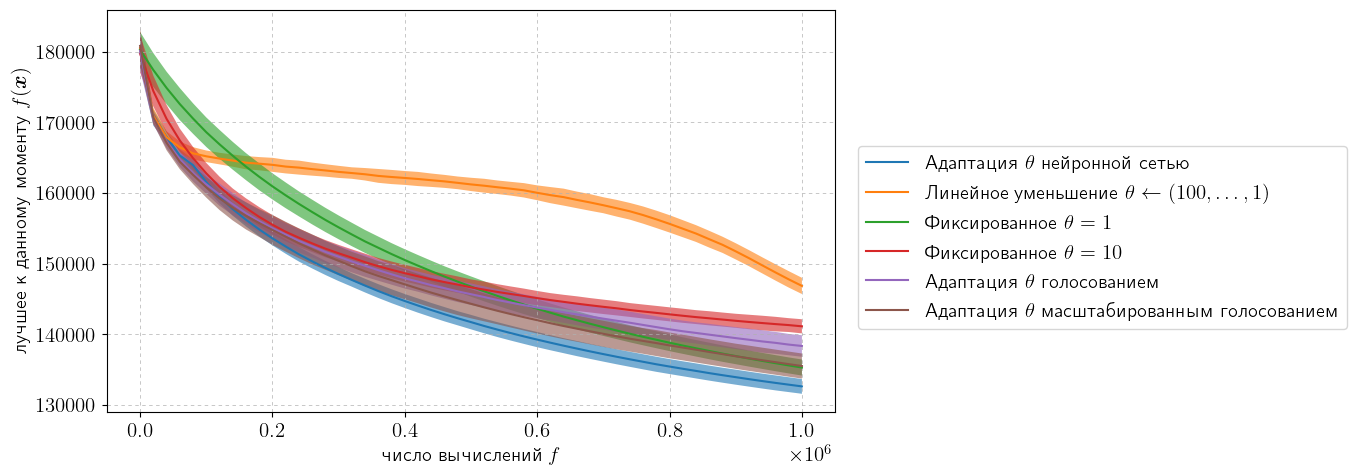

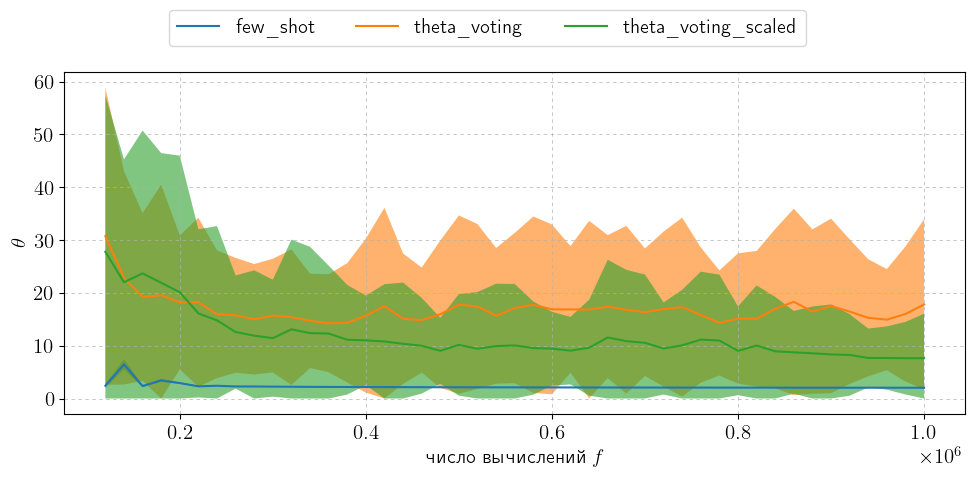

In [77]:
import matplotlib.pyplot as plt
import numpy as np

import FewShotCVRP.utils.plots as myplots

myplots.good_plt_config()


def get_label_name(algorithm_name):
    if algorithm_name == "few_shot":
        return r"Адаптация $\theta$ нейронной сетью"
    if algorithm_name == "theta_control":
        return r"Адаптация $\theta$ нейронной сетью"
    if algorithm_name == "descent":
        return "Cинхронный спуск"
    if algorithm_name == "theta_schedule_linear":
        return r"Линейное уменьшение $\theta \gets \br{100, \ldots, 1}$"
    if algorithm_name == "theta_fixed_1":
        return r"Фиксированное $\theta=1$"
    if algorithm_name == "theta_fixed_10":
        return r"Фиксированное $\theta=10$"
    if algorithm_name == "theta_voting":
        return r"Адаптация $\theta$ голосованием"
    if algorithm_name == "theta_voting_scaled":
        return r"Адаптация $\theta$ масштабированным голосованием"
    if algorithm_name == "theta_one_fifth":
        return r"Адаптация $\theta$ правилом $1/5$"


def plot_convergence_from_stats(
    st,
    instance_name: str,
    algorithms: list[str],
    nn_trained_on_instance: str | None = None,
    nn_training_method: str | None = None,
    title: str | None = None,
    *,
    ax=None,
    legend_outside: bool = True,
    show: bool = True,
    show_legend: bool = True,
    colors: list[str] | None = None,
):
    created_fig = ax is None
    if created_fig:
        fig, ax = plt.subplots(figsize=(10, 5))
    else:
        fig = ax.figure

    handles = []
    labels = []
    for num_alg, algo in enumerate(algorithms):
        if algo == "theta_control":
            df = st.get_stats_for(
                algorithm_name=algo,
                cvrp_instance_name=instance_name,
                nn_trained_on_instance=nn_trained_on_instance,
                nn_training_method=nn_training_method,
            )
        else:
            df = st.get_stats_for(
                algorithm_name=algo,
                cvrp_instance_name=instance_name,
                nn_trained_on_instance=None,
                nn_training_method=None,
            )

        if df.empty:
            continue

        df = df.sort_values("evals")
        x = df["evals"].to_numpy()
        y_mean = df["best_so_far_mean"].to_numpy()
        y_std = df["best_so_far_std"].to_numpy()

        if colors is None:
            (line,) = ax.plot(x, y_mean, label=algo)
            if np.any(~np.isnan(y_std)):
                ax.fill_between(x, y_mean - y_std, y_mean + y_std, alpha=0.6)
        else:
            color = colors[num_alg]
            (line,) = ax.plot(x, y_mean, label=algo, c=color)
            if np.any(~np.isnan(y_std)):
                ax.fill_between(x, y_mean - y_std, y_mean + y_std, alpha=0.6, color=color)            

        handles.append(line)
        labels.append(get_label_name(algo))

    ax.set_xlabel(r"число вычислений $f$")
    ax.set_ylabel(r"лучшее к данному моменту $f(\bm{x})$")
    if title:
        ax.set_title(title, y=1.03)

    if handles:
        if show_legend:
            if legend_outside and created_fig:
                fig.tight_layout(rect=[0, 0, 0.87, 1])
                fig.legend(
                    handles,
                    labels,
                    loc="center left",
                    bbox_to_anchor=(0.86, 0.5),
                    ncol=1,
                    frameon=True,
                )
            else:
                # ax.legend(handles, labels, loc="upper right", frameon=True)
                fig.legend(
                    handles,
                    labels,
                    loc="upper center",
                    bbox_to_anchor=(0.5, 0.98),
                    ncol=len(handles),
                    frameon=True,
                )
                if created_fig:
                    fig.tight_layout()
        elif created_fig:
            fig.tight_layout()
    elif created_fig:
        fig.tight_layout()

    if created_fig and show:
        plt.show()

    return ax


def plot_theta_from_stats(
    st,
    instance_name: str,
    algorithms: list[str],
    nn_trained_on_instance: str | None = None,
    nn_training_method: str | None = None,
    title: str | None = None,
):
    """
    Plot mean theta with ±1 std band vs evals for each algorithm.
    Data are taken from EAStatsStore aggregated stats.
    """
    myplots.good_plt_config()
    fig, ax = plt.subplots(figsize=(10, 5))

    handles, labels = [], []
    for algo in algorithms:
        if algo == "theta_control":
            df = st.get_stats_for(
                algorithm_name=algo,
                cvrp_instance_name=instance_name,
                nn_trained_on_instance=nn_trained_on_instance,
                nn_training_method=nn_training_method,
            )
        else:
            df = st.get_stats_for(
                algorithm_name=algo,
                cvrp_instance_name=instance_name,
                nn_trained_on_instance=None,
                nn_training_method=None,
            )
        if df.empty:
            continue

        df = df.sort_values("evals")
        x = df["evals"].to_numpy()[6:]
        t_mean = df["theta_mean"].to_numpy()[6:]
        t_std = df["theta_std"].to_numpy()[6:]

        (line,) = ax.plot(x, t_mean, label=algo)

        if np.any(~np.isnan(t_std)):
            t_low = np.maximum(t_mean - t_std, 0.0)
            t_high = np.maximum(t_mean + t_std, t_low)
            ax.fill_between(x, t_low, t_high, alpha=0.6)

        handles.append(line)
        labels.append(algo)

    ax.set_xlabel(r"число вычислений $f$")
    ax.set_ylabel(r"$\theta$")
    if handles:
        fig.tight_layout(rect=[0, 0, 1, 0.88])
        fig.legend(
            handles,
            labels,
            loc="upper center",
            bbox_to_anchor=(0.5, 0.98),
            ncol=len(handles),
            frameon=True,
        )
    else:
        fig.tight_layout()

    if title:
        ax.set_title(title, y=1.03)

    plt.show()


algorithms = [
    "few_shot",
    "theta_schedule_linear",
    "theta_fixed_1",
    "theta_fixed_10",
    "theta_voting",
    "theta_voting_scaled",
]

plot_convergence_from_stats(
    st=_st,
    instance_name="X-n219-k73.xml",
    algorithms=algorithms,
)

algorithms = [
    "few_shot",
    "theta_voting",
    "theta_voting_scaled",
]

plot_theta_from_stats(
    st=_st,
    instance_name="X-n219-k73.xml",
    algorithms=algorithms,
)

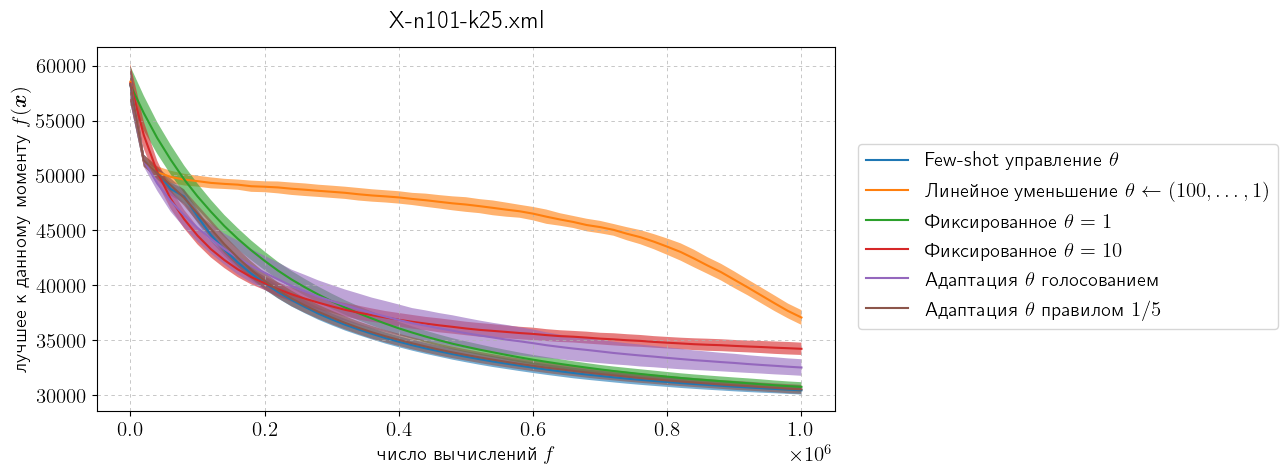

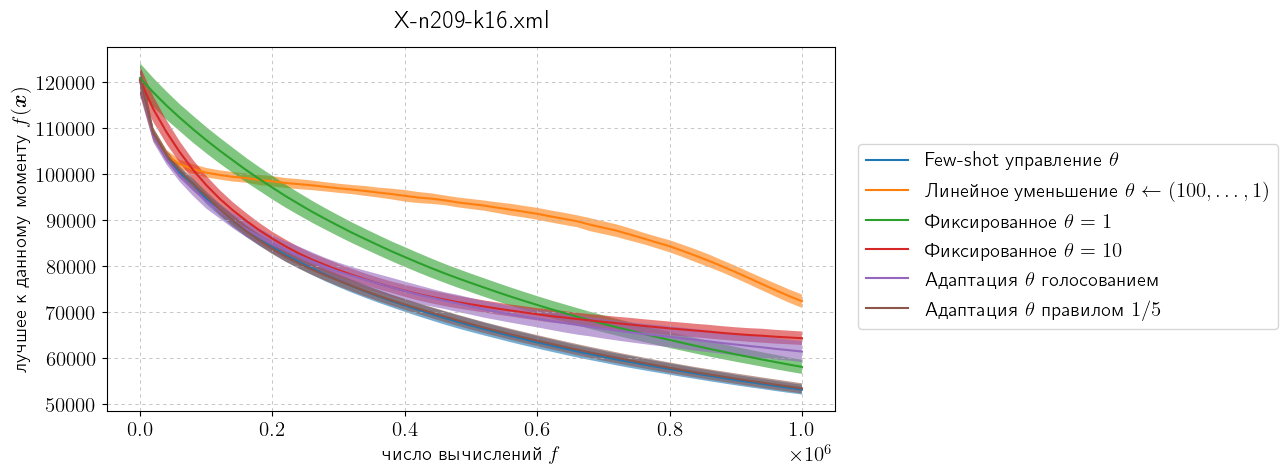

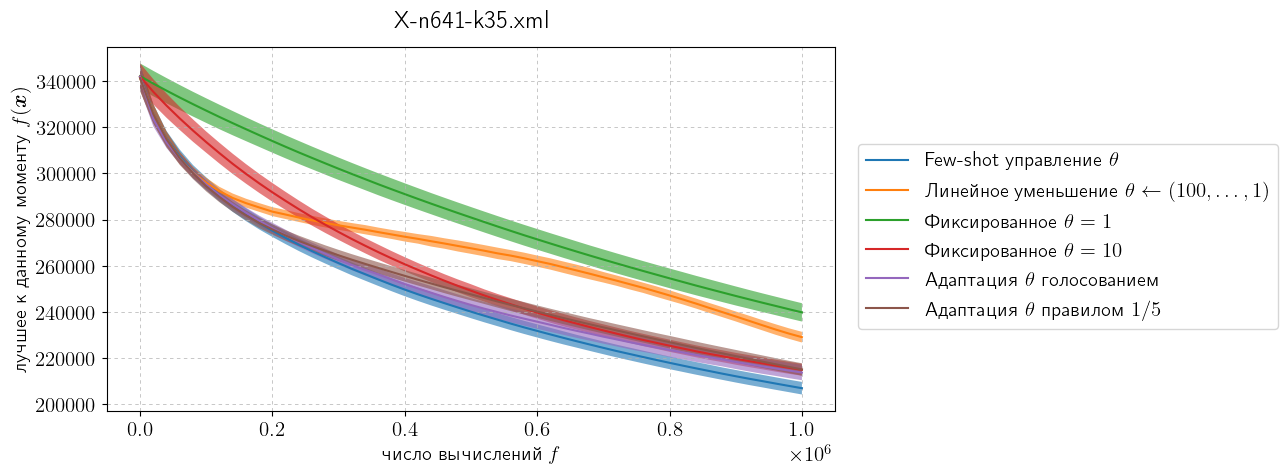

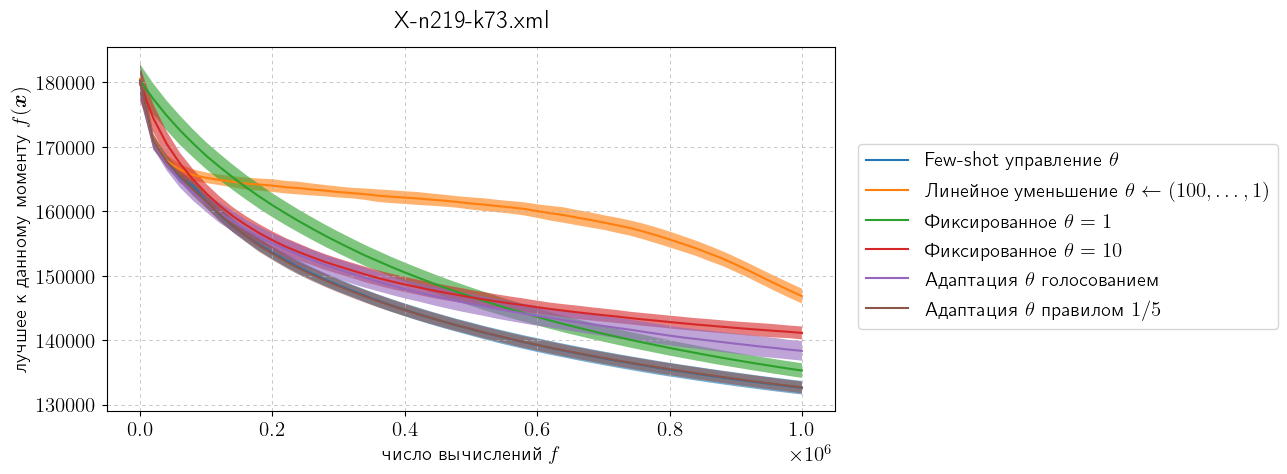

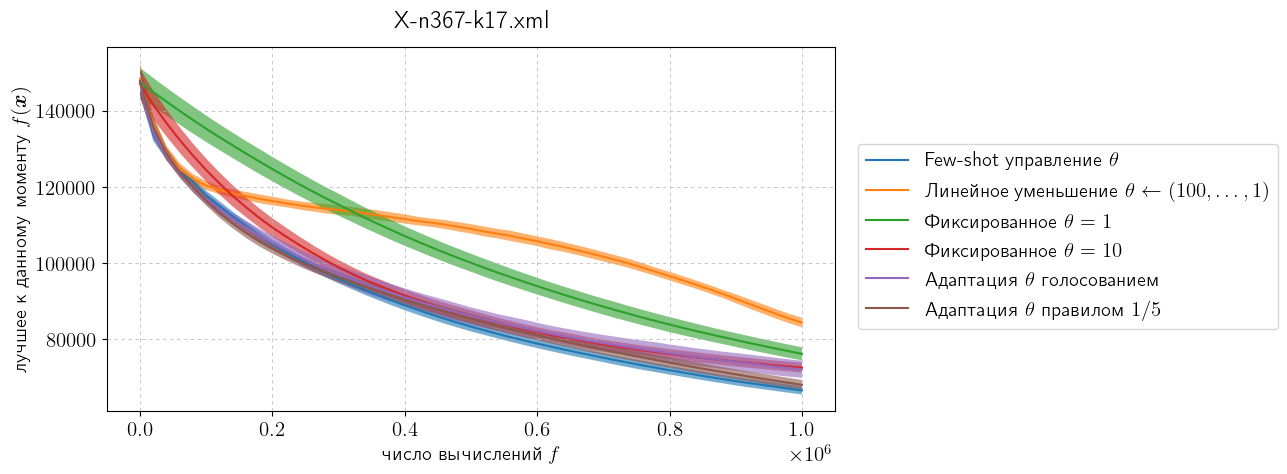

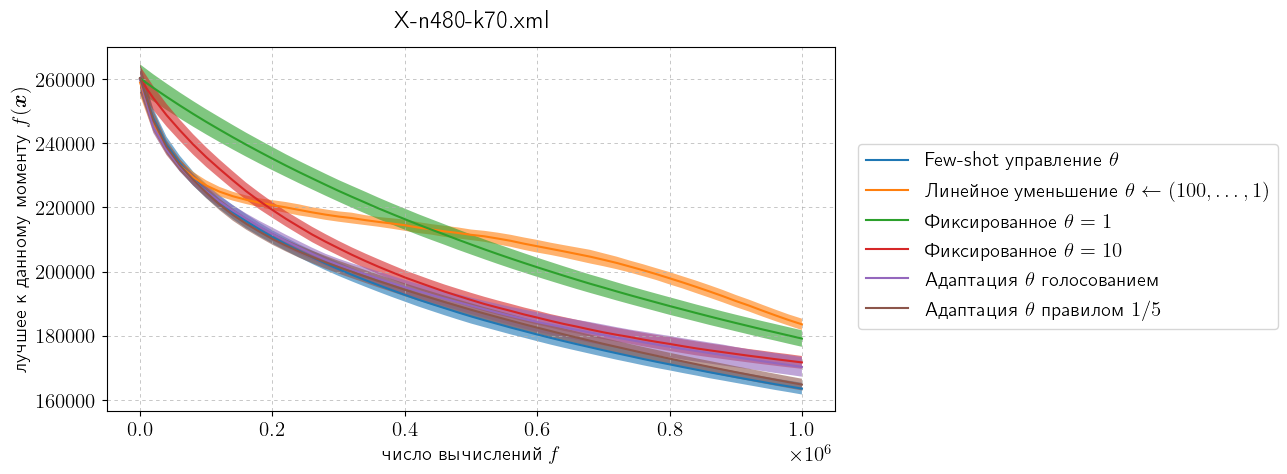

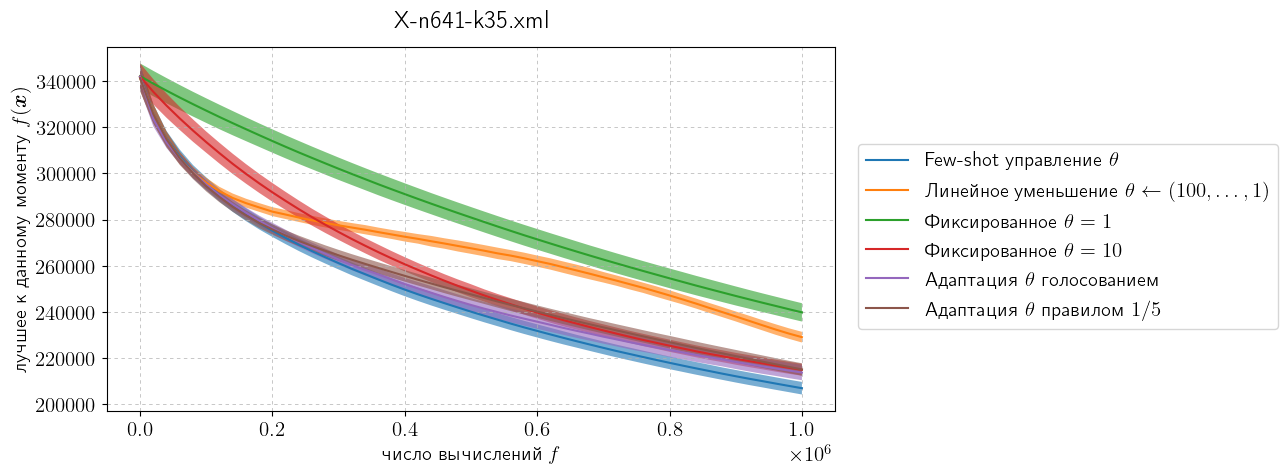

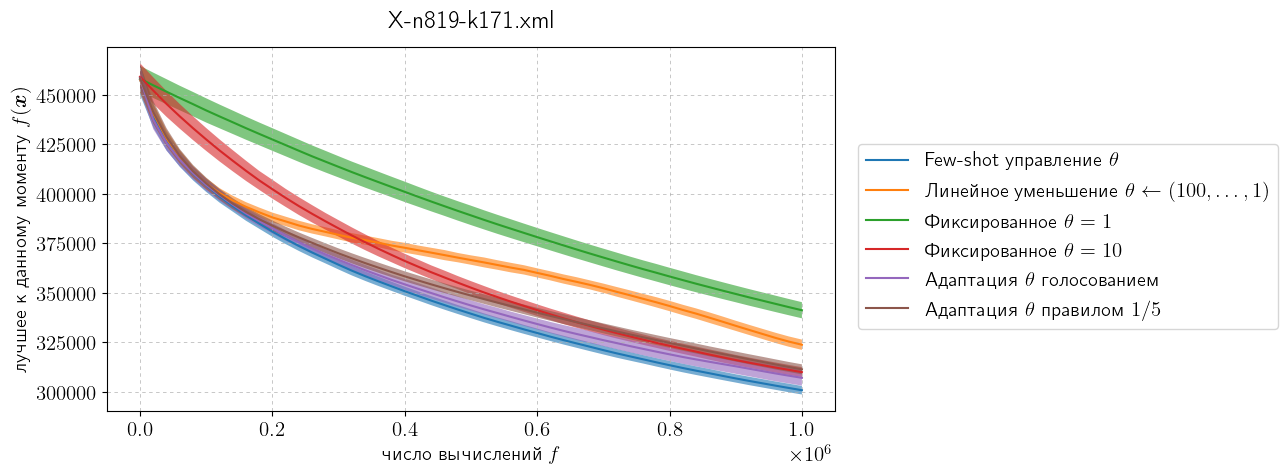

In [27]:
instances = [
    "X-n101-k25.xml",
    "X-n209-k16.xml",
    "X-n641-k35.xml",
    "X-n219-k73.xml",
    "X-n367-k17.xml",
    "X-n480-k70.xml",
    "X-n641-k35.xml",
    "X-n819-k171.xml",
]
for instance in instances:
    algorithms = [
        "few_shot",
        "theta_schedule_linear",
        "theta_fixed_1",
        "theta_fixed_10",
        "theta_voting",
        # "theta_voting_scaled",
        "theta_one_fifth",
    ]

    plot_convergence_from_stats(
        st=_st,
        instance_name=instance,
        algorithms=algorithms,
        # nn_trained_on_instance="X-n641-k35.xml",
        # nn_training_method="kpca-bo",
        title=f"{instance}",
    )

    # algorithms = [
    #     "few_shot"
    #     # "theta_control",
    #     # "descent",
    #     # "theta_schedule_linear",
    #     # "theta_fixed_1",
    #     # "theta_fixed_10",
    # ]

    # plot_theta_from_stats(
    #     st=st,
    #     instance_name=instance,
    #     algorithms=algorithms,
    #     # nn_trained_on_instance="X-n641-k35.xml",
    #     # nn_training_method="kpca-bo",
    #     title=f"Convergence: {instance}",
    # )

### Creating commulative pictures


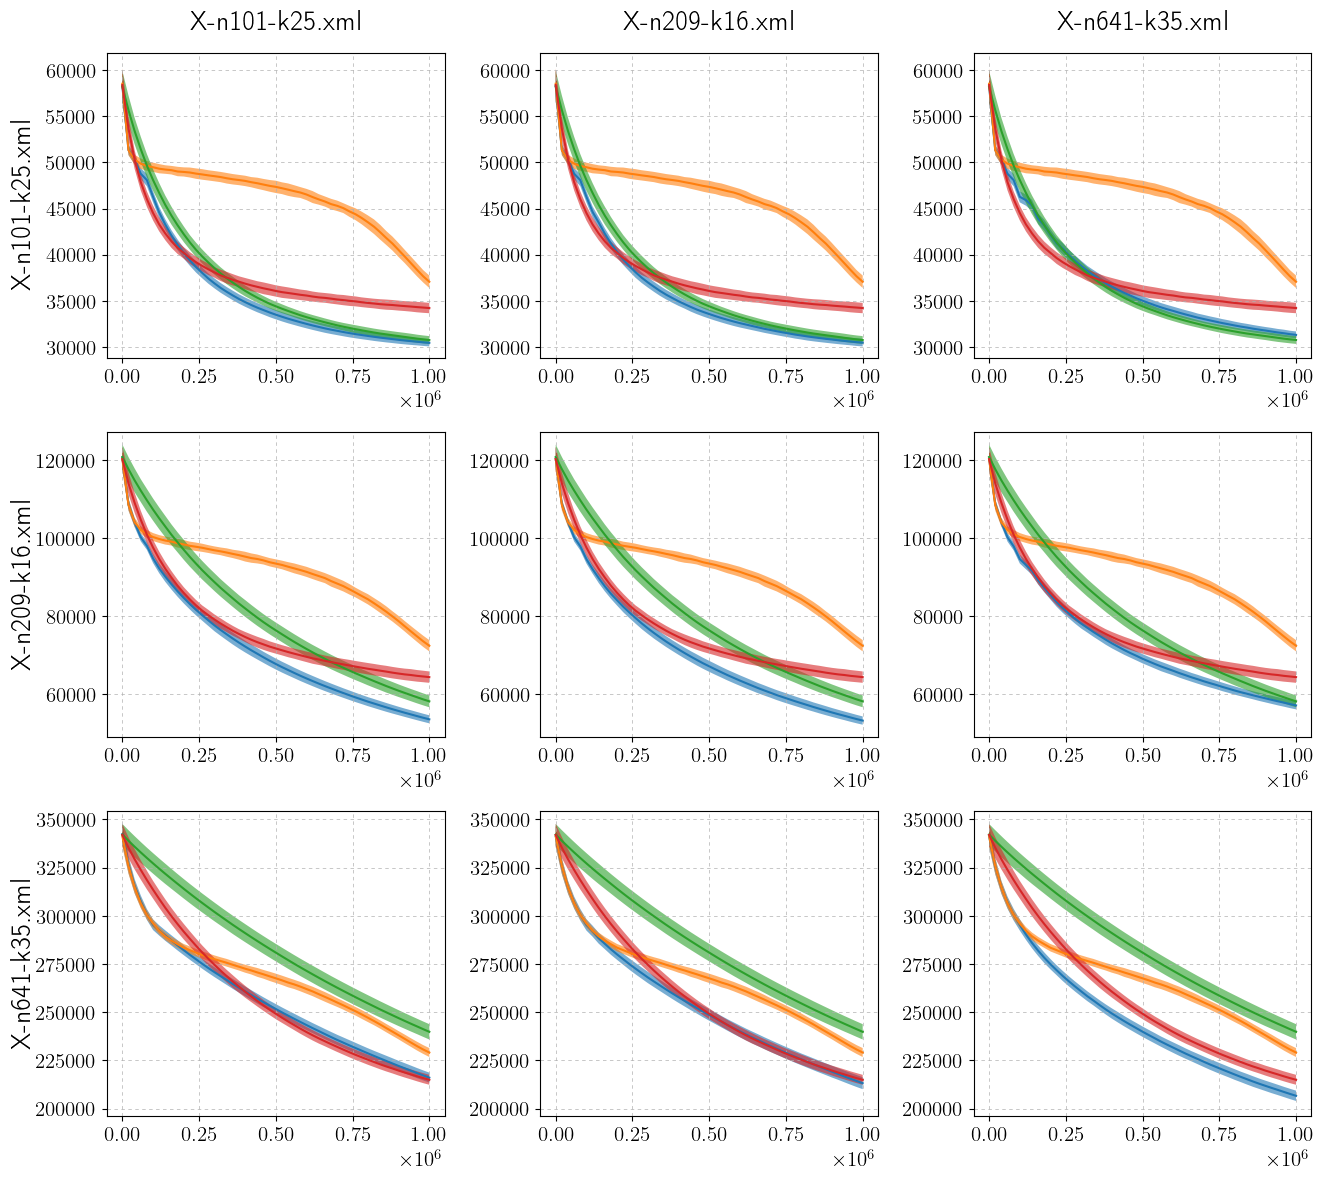

In [65]:
import matplotlib.pyplot as plt
import numpy as np

import FewShotCVRP.utils.plots as myplots

myplots.good_plt_config()


def get_label_name(algorithm_name):
    if algorithm_name == "few_shot":
        return r"Адаптация $\theta$ нейронной сетью"
    if algorithm_name == "theta_control":
        return r"Адаптация $\theta$ нейронной сетью"
    if algorithm_name == "descent":
        return "Cинхронный спуск"
    if algorithm_name == "theta_schedule_linear":
        return r"Линейное уменьшение $\theta \gets \br{100, \ldots, 1}$"
    if algorithm_name == "theta_fixed_1":
        return r"Фиксированное $\theta=1$"
    if algorithm_name == "theta_fixed_10":
        return r"Фиксированное $\theta=10$"
    if algorithm_name == "theta_voting":
        return r"Адаптация $\theta$ голосованием"
    if algorithm_name == "theta_voting_scaled":
        return r"Адаптация $\theta$ масштабированным голосованием"
    if algorithm_name == "theta_one_fifth":
        return r"Адаптация $\theta$ правилом $1/5$"


def _fetch_convergence_curves(
    st,
    instance_name: str,
    trained_on_value: str | None,
    algorithms: list[str],
    nn_training_method: str | None,
):
    curves: dict[str, tuple[np.ndarray, np.ndarray, np.ndarray]] = {}
    for algo in algorithms:
        if algo == "theta_control":
            df = st.get_stats_for(
                algorithm_name=algo,
                cvrp_instance_name=instance_name,
                nn_trained_on_instance=trained_on_value,
                nn_training_method=nn_training_method,
            )
        else:
            df = st.get_stats_for(
                algorithm_name=algo,
                cvrp_instance_name=instance_name,
                nn_trained_on_instance=None,
                nn_training_method=None,
            )

        if df.empty:
            continue

        df = df.sort_values("evals")
        curves[algo] = (
            df["evals"].to_numpy(),
            df["best_so_far_mean"].to_numpy(),
            df["best_so_far_std"].to_numpy(),
        )

    return curves


def _plot_curves_on_axis(
    ax,
    curves: dict[str, tuple[np.ndarray, np.ndarray, np.ndarray]],
):
    handles, labels = [], []
    for algo, (x, y_mean, y_std) in curves.items():
        label = get_label_name(algo)
        (line,) = ax.plot(x, y_mean, label=label)
        if np.any(~np.isnan(y_std)):
            ax.fill_between(x, y_mean - y_std, y_mean + y_std, alpha=0.6,)
        handles.append(line)
        labels.append(label)

    return handles, labels


def plot_convergence_from_stats(
    st,
    instance_name: str,
    algorithms: list[str],
    nn_trained_on_instance: str | None = None,
    nn_training_method: str | None = None,
    title: str | None = None,
    *,
    ax=None,
    legend_outside: bool = True,
    show: bool = True,
    show_legend: bool = True,
):
    curves = _fetch_convergence_curves(
        st=st,
        instance_name=instance_name,
        trained_on_value=nn_trained_on_instance,
        algorithms=algorithms,
        nn_training_method=nn_training_method,
    )

    created_fig = ax is None
    if created_fig:
        fig, ax = plt.subplots(figsize=(10, 5))
    else:
        fig = ax.figure

    handles, labels = _plot_curves_on_axis(ax, curves)

    # ax.set_xlabel(r"число вычислений $f$")
    # ax.set_ylabel(r"лучшее к данному моменту $f(\bm{x})$")
    if title:
        ax.set_title(title, y=1.03, fontsize=40)

    if handles:
        if show_legend:
            if legend_outside and created_fig:
                fig.tight_layout(rect=[0, 0, 1, 0.9])
                fig.legend(
                    handles,
                    labels,
                    loc="lower center",
                    bbox_to_anchor=(0.5, 1.02),
                    ncol=len(labels),
                    frameon=True,
                )
            else:
                ax.legend(handles, labels, loc="upper right", frameon=True)
                if created_fig:
                    fig.tight_layout()
        elif created_fig:
            fig.tight_layout()
    elif created_fig:
        fig.tight_layout()

    if created_fig and show:
        plt.show()

    return ax


def plot_convergence_grid(
    st,
    algorithms: list[str],
    run_on: list[str],
    trained_on: list[str],
    nn_training_method: str | None = None,
):
    combos = {
        (instance_name, trained_on_value): _fetch_convergence_curves(
            st=st,
            instance_name=instance_name,
            trained_on_value=trained_on_value,
            algorithms=algorithms,
            nn_training_method=nn_training_method,
        )
        for instance_name in run_on
        for trained_on_value in trained_on
    }

    n_rows = len(run_on)
    n_cols = len(trained_on)
    fig, axes = plt.subplots(
        n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), squeeze=False
    )

    row_limits: dict[str, tuple[float, float] | None] = {}
    for instance_name in run_on:
        row_min, row_max = np.inf, -np.inf
        for trained_on_value in trained_on:
            curves = combos[(instance_name, trained_on_value)]
            for _, (x, y_mean, y_std) in curves.items():
                if np.all(np.isnan(y_mean)):
                    continue
                lower = float(np.nanmin(y_mean))
                upper = float(np.nanmax(y_mean))
                if np.any(~np.isnan(y_std)):
                    lower = min(lower, float(np.nanmin(y_mean - 4 * y_std)))
                    upper = max(upper, float(np.nanmax(y_mean + 2 * y_std)))
                row_min = min(row_min, lower)
                row_max = max(row_max, upper)
        if row_min == np.inf or row_max == -np.inf:
            row_limits[instance_name] = None
        else:
            row_limits[instance_name] = (row_min, row_max)

    legend_handles = {}
    for row, instance_name in enumerate(run_on):
        for col, trained_on_value in enumerate(trained_on):
            ax = axes[row][col]
            curves = combos[(instance_name, trained_on_value)]
            handles, labels = _plot_curves_on_axis(ax, curves)

            for handle, label in zip(handles, labels):
                legend_handles.setdefault(label, handle)

            row_lim = row_limits[instance_name]
            if row_lim is not None:
                ax.set_ylim(row_lim)

            # if row == n_rows - 1:
            #     ax.set_xlabel(r"число вычислений $f$")
            # else:
            #     ax.set_xlabel("")

            # if col == 0:
            #     ax.set_ylabel(r"лучшее к данному моменту $f(\bm{x})$")
            # else:
            #     ax.set_ylabel("")
            #     ax.tick_params(axis="y", which="both", left=False, labelleft=False)

            if not curves:
                ax.text(
                    0.5,
                    0.5,
                    "Нет данных",
                    transform=ax.transAxes,
                    ha="center",
                    va="center",
                )

            if row == 0:
                label_axis = axes[0][col]
                label_axis.text(
                    0.50,
                    1.10,
                    run_on[col],
                    transform=label_axis.transAxes,
                    rotation=0,
                    va="center",
                    ha="center",
                    fontsize=20,
                )
            # if row == 0 and col == 1:
            #     label_axis = axes[row][col]
            #     label_axis.text(
            #         0.50,
            #         1.4,
            #         "Обучение за задачах",
            #         transform=label_axis.transAxes,
            #         rotation=0,
            #         va="center",
            #         ha="center",
            #         fontsize=20,
            #     )
            # if row == 1 and col == 0:
            #     label_axis = axes[row][col]
            #     label_axis.text(
            #         -0.60,
            #         0.5,
            #         "Применение к задачам",
            #         transform=label_axis.transAxes,
            #         rotation=90,
            #         va="center",
            #         ha="center",
            #         fontsize=20,
            #     )

        label_axis = axes[row][0]
        label_axis.text(
            -0.25,
            0.5,
            instance_name,
            transform=label_axis.transAxes,
            rotation=90,
            va="center",
            ha="center",
            fontsize=20,
        )

    legend_handles = {}
    if legend_handles:
        handles = list(legend_handles.values())
        labels = list(legend_handles.keys())
        fig.tight_layout(rect=[0.08, 0, 0.92, 0.88])
        fig.legend(
            handles,
            labels,
            loc="lower center",
            bbox_to_anchor=(0.5, 0.9),
            ncol=len(labels),
            frameon=True,
        )
    else:
        fig.tight_layout(rect=[0.08, 0, 0.98, 1])

    return fig


algorithms = [
    "theta_control",
    "theta_schedule_linear",
    "theta_fixed_1",
    "theta_fixed_10",
]

trained_on = ["X-n101-k25.xml", "X-n209-k16.xml", "X-n641-k35.xml"]
run_on = ["X-n101-k25.xml", "X-n209-k16.xml", "X-n641-k35.xml"]

fig = plot_convergence_grid(
    st=_st,
    algorithms=algorithms,
    run_on=run_on,
    trained_on=trained_on,
    nn_training_method="kpca-bo",
)

fig.savefig("../outputs/figures/convergence_grid_kpca_bo.pdf")

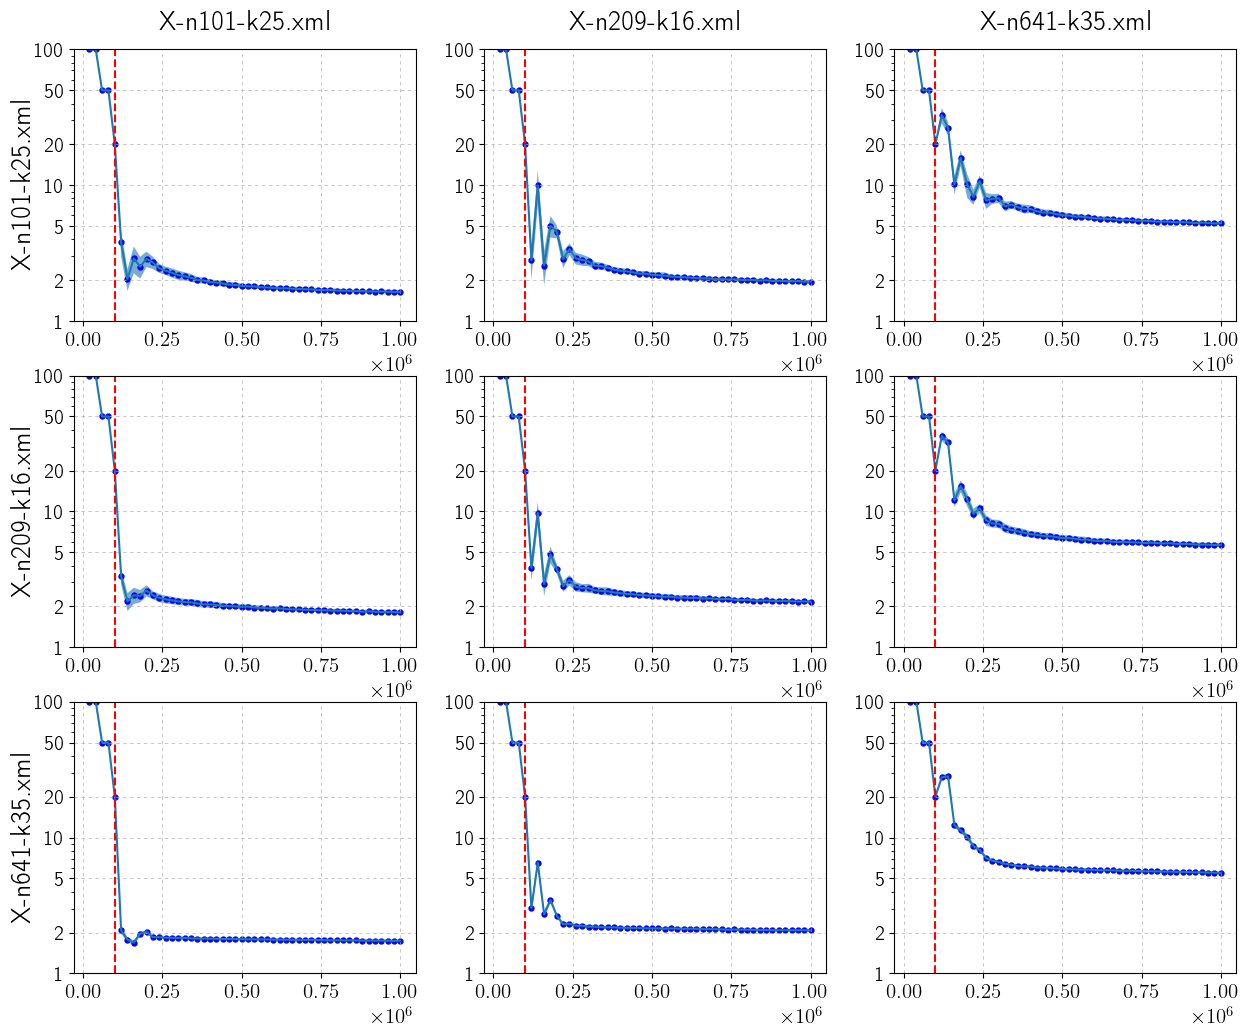

In [29]:
import matplotlib.pyplot as plt
import numpy as np

import FewShotCVRP.utils.plots as myplots

myplots.good_plt_config()


def get_label_name(algorithm_name):
    if algorithm_name == "theta_control":
        return r"Управление $\theta$"
    if algorithm_name == "descent":
        return "Cинхронный спуск"
    if algorithm_name == "theta_schedule_linear":
        return r"Линейное уменьшение $\theta \gets \br{100, \ldots, 1}$"
    if algorithm_name == "theta_fixed_1":
        return r"Фиксированное $\theta=1$"
    if algorithm_name == "theta_fixed_10":
        return r"Фиксированное $\theta=10$"


def _fetch_convergence_curves(
    st,
    instance_name: str,
    trained_on_value: str | None,
    algorithms: list[str],
    nn_training_method: str | None,
):
    curves: dict[str, tuple[np.ndarray, np.ndarray, np.ndarray]] = {}
    for algo in algorithms:
        if algo == "theta_control":
            df = st.get_stats_for(
                algorithm_name=algo,
                cvrp_instance_name=instance_name,
                nn_trained_on_instance=trained_on_value,
                nn_training_method=nn_training_method,
            )
        else:
            df = st.get_stats_for(
                algorithm_name=algo,
                cvrp_instance_name=instance_name,
                nn_trained_on_instance=None,
                nn_training_method=None,
            )

        if df.empty:
            continue

        df = df.sort_values("evals")
        curves[algo] = (
            df["evals"].to_numpy()[1:],
            df["theta_mean"].to_numpy()[1:],
            df["theta_std"].to_numpy()[1:],
        )

    return curves


def _plot_curves_on_axis(
    ax, curves: dict[str, tuple[np.ndarray, np.ndarray, np.ndarray]]
):
    handles, labels = [], []
    for algo, (x, y_mean, y_std) in curves.items():
        label = get_label_name(algo)
        (line,) = ax.plot(x, y_mean, label=label)
        if np.any(~np.isnan(y_std)):
            ax.fill_between(x, y_mean - y_std, y_mean + y_std, alpha=0.6)
            ax.scatter(x, y_mean, s=50, marker=".", c="blue")
        handles.append(line)
        labels.append(label)

    return handles, labels


def plot_convergence_from_stats(
    st,
    instance_name: str,
    algorithms: list[str],
    nn_trained_on_instance: str | None = None,
    nn_training_method: str | None = None,
    title: str | None = None,
    *,
    ax=None,
    legend_outside: bool = True,
    show: bool = True,
    show_legend: bool = True,
):
    curves = _fetch_convergence_curves(
        st=st,
        instance_name=instance_name,
        trained_on_value=nn_trained_on_instance,
        algorithms=algorithms,
        nn_training_method=nn_training_method,
    )

    created_fig = ax is None
    if created_fig:
        fig, ax = plt.subplots(figsize=(10, 5))
    else:
        fig = ax.figure

    handles, labels = _plot_curves_on_axis(ax, curves)

    # ax.set_xlabel(r"число вычислений $f$")
    # ax.set_ylabel(r"лучшее к данному моменту $f(\bm{x})$")
    if title:
        ax.set_title(title, y=1.03, fontsize=25)

    if handles:
        if show_legend:
            if legend_outside and created_fig:
                fig.tight_layout(rect=[0, 0, 1, 0.9])
                fig.legend(
                    handles,
                    labels,
                    loc="lower center",
                    bbox_to_anchor=(0.5, 1.02),
                    ncol=len(labels),
                    frameon=True,
                )
            else:
                ax.legend(handles, labels, loc="upper right", frameon=True)
                if created_fig:
                    fig.tight_layout()
        elif created_fig:
            fig.tight_layout()
    elif created_fig:
        fig.tight_layout()

    if created_fig and show:
        plt.show()

    return ax


def plot_theta_grid(
    st,
    algorithms: list[str],
    run_on: list[str],
    trained_on: list[str],
    nn_training_method: str | None = None,
):
    combos = {
        (instance_name, trained_on_value): _fetch_convergence_curves(
            st=st,
            instance_name=instance_name,
            trained_on_value=trained_on_value,
            algorithms=algorithms,
            nn_training_method=nn_training_method,
        )
        for instance_name in run_on
        for trained_on_value in trained_on
    }

    n_rows = len(run_on)
    n_cols = len(trained_on)
    fig, axes = plt.subplots(
        n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), squeeze=False
    )
    tick_values = [1, 2, 5, 10, 20, 50, 100]
    tick_labels = [str(v) for v in tick_values]

    row_limits: dict[str, tuple[float, float] | None] = {}
    for instance_name in run_on:
        row_min, row_max = np.inf, -np.inf
        for trained_on_value in trained_on:
            curves = combos[(instance_name, trained_on_value)]
            for _, (x, y_mean, y_std) in curves.items():
                if np.all(np.isnan(y_mean)):
                    continue
                lower = float(np.nanmin(y_mean))
                upper = float(np.nanmax(y_mean))
                if np.any(~np.isnan(y_std)):
                    lower = min(lower, float(np.nanmin(y_mean - 4 * y_std)))
                    upper = max(upper, float(np.nanmax(y_mean + 2 * y_std)))
                row_min = min(1.0, lower)
                row_max = max(row_max, upper)
        if row_min == np.inf or row_max == -np.inf:
            row_limits[instance_name] = None
        else:
            row_limits[instance_name] = (row_min, row_max)

    legend_handles = {}
    for row, instance_name in enumerate(run_on):
        for col, trained_on_value in enumerate(trained_on):
            ax = axes[row][col]
            ax.set_yscale("log")
            curves = combos[(instance_name, trained_on_value)]
            handles, labels = _plot_curves_on_axis(ax, curves)

            for handle, label in zip(handles, labels):
                legend_handles.setdefault(label, handle)

            row_lim = row_limits[instance_name]
            if row_lim is not None:
                ax.set_ylim(row_lim)

            ax.set_yticks(tick_values)
            ax.set_yticklabels(tick_labels)

            # if row == n_rows - 1:
            #     ax.set_xlabel(r"число вычислений $f$")
            # else:
            #     ax.set_xlabel("")

            # if col == 0:
            #     ax.set_ylabel(r"$\theta$")
            # else:
            #     ax.set_ylabel("")
            #     ax.tick_params(axis="y", which="both", left=False, labelleft=False)

            rgb_color = np.array([252, 141, 98]) / 255
            ax.axvline(x=5*20000, color="red", linestyle='--')

            if not curves:
                ax.text(
                    0.5,
                    0.5,
                    "Нет данных",
                    transform=ax.transAxes,
                    ha="center",
                    va="center",
                )

            if row == 0:
                label_axis = axes[0][col]
                label_axis.text(
                    0.50,
                    1.10,
                    run_on[col],
                    transform=label_axis.transAxes,
                    rotation=0,
                    va="center",
                    ha="center",
                    fontsize=20,
                )
            # if row == 0 and col == 1:
            #     label_axis = axes[row][col]
            #     label_axis.text(
            #         0.50,
            #         1.4,
            #         "Обучение за задачах",
            #         transform=label_axis.transAxes,
            #         rotation=0,
            #         va="center",
            #         ha="center",
            #         fontsize=20,
            #     )
            # if row == 1 and col == 0:
            #     label_axis = axes[row][col]
            #     label_axis.text(
            #         -0.60,
            #         0.5,
            #         "Применение к задачам",
            #         transform=label_axis.transAxes,
            #         rotation=90,
            #         va="center",
            #         ha="center",
            #         fontsize=20,
            #     )

        label_axis = axes[row][0]
        label_axis.text(
            -0.15,
            0.5,
            instance_name,
            transform=label_axis.transAxes,
            rotation=90,
            va="center",
            ha="center",
            fontsize=20,
        )

    # if legend_handles:
    #     handles = list(legend_handles.values())
    #     labels = list(legend_handles.keys())
    #     fig.tight_layout(rect=[0.08, 0, 0.92, 0.88])
    #     fig.legend(
    #         handles,
    #         labels,
    #         loc="lower center",
    #         bbox_to_anchor=(0.5, 0.9),
    #         ncol=len(labels),
    #         frameon=True,
    #     )
    # else:
    #     fig.tight_layout(rect=[0.08, 0, 0.98, 1])


    return fig


algorithms = [
    "theta_control",
]

trained_on = ["X-n101-k25.xml", "X-n209-k16.xml", "X-n641-k35.xml"]
run_on = ["X-n101-k25.xml", "X-n209-k16.xml", "X-n641-k35.xml"]

fig = plot_theta_grid(
    st=st,
    algorithms=algorithms,
    run_on=run_on,
    trained_on=trained_on,
    nn_training_method="kpca-bo",
)

fig.savefig("../outputs/figures/theta_grid_kpca_bo.pdf")

### Update database with experiments

In [ ]:
st.compute_stats()

st.save_raw("ea_runs/raw_runs.parquet")
st.save_stats("ea_runs/aggregated_stats.parquet")

### Application of few_shot to new instances

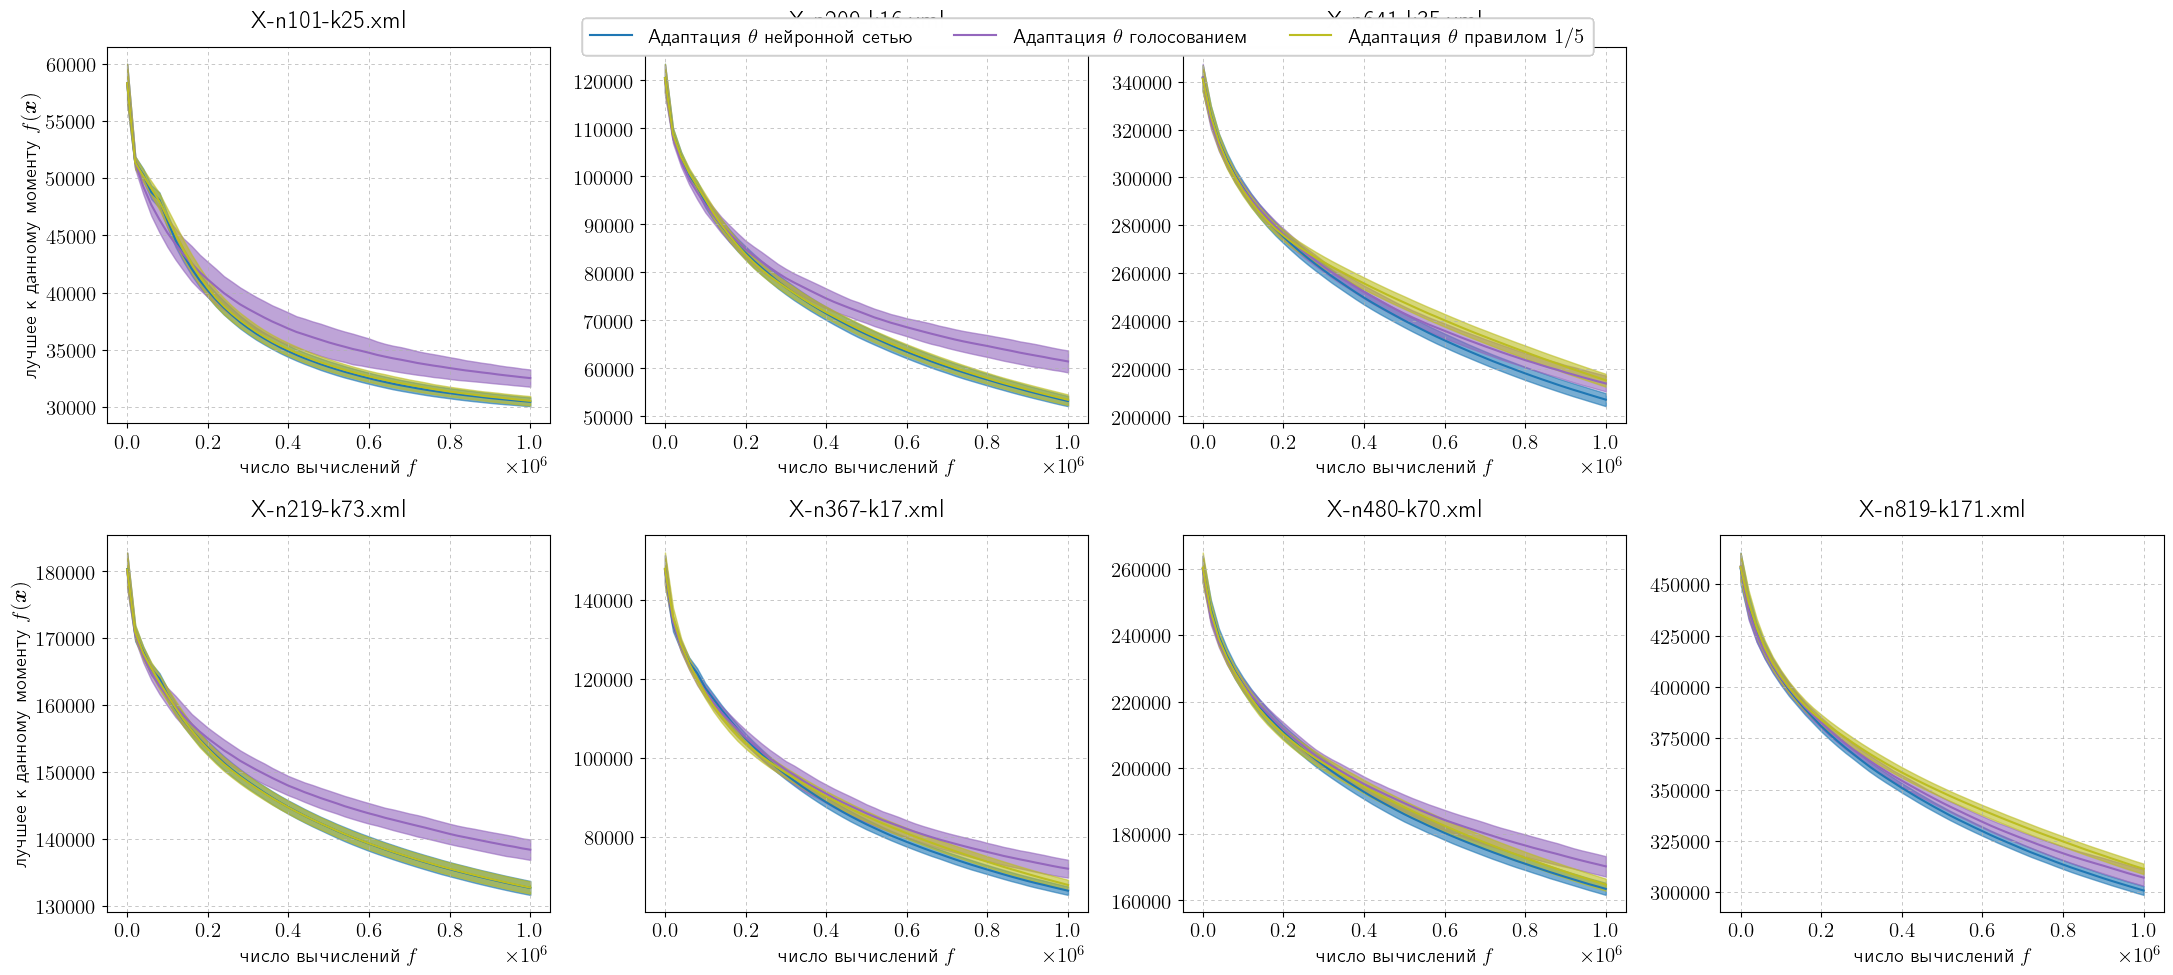

In [78]:
import FewShotCVRP.utils.plots as myplots
from importlib import reload

reload(myplots)

myplots.good_plt_config()

DEFAULT_MPL_COLORS = plt.rcParams["axes.prop_cycle"].by_key()["color"]

instances = [
    "X-n101-k25.xml",
    "X-n209-k16.xml",
    "X-n641-k35.xml",
    "X-n219-k73.xml",
    "X-n367-k17.xml",
    "X-n480-k70.xml",
    "X-n819-k171.xml",
]

algorithms = [
    "few_shot",
    # "theta_schedule_linear",
    # "theta_fixed_1",
    # "theta_fixed_10",
    "theta_voting",
    "theta_one_fifth",
]

colors = [DEFAULT_MPL_COLORS[0], DEFAULT_MPL_COLORS[4], DEFAULT_MPL_COLORS[8]]

fig, axes = plt.subplots(2, 4, figsize=(22, 10))
axes = axes.reshape(2, 4)

for ax in axes.flatten():
    ax.set_visible(False)

for idx, instance in enumerate(instances):
    row = 0 if idx < 3 else 1
    col = idx if idx < 3 else idx - 3
    ax = axes[row, col]
    ax.set_visible(True)

    plot_convergence_from_stats(
        st=_st,
        instance_name=instance,
        algorithms=algorithms,
        title=f"{instance}",
        ax=ax,
        legend_outside=False,
        show=True,
        show_legend=True,
        colors=colors,
    )

    if col != 0:
        ax.set_ylabel("")
        # ax.tick_params(axis="y", labelleft=False, left=False)


fig.tight_layout()
fig.savefig("../outputs/figures/train-test-instances-comp.pdf")

In [ ]:

DEFAULT_MPL_COLORS

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']